In [86]:
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install tabulate

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [87]:
from PIL import Image
import os

In [88]:
#print the current directory
print(os.getcwd())

/tf/Purushothaman/6 Class model/Balanced Model


In [89]:
images = []
labels = []

master_data_path = "/tf/Purushothaman/6_class_combined_data"



def load_images_and_labels(folder_path, label):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isdir(file_path):
            load_images_and_labels(file_path, filename)
        elif filename.lower().endswith(('png', 'jpeg', 'jpg')):
            try:
                img = Image.open(file_path)
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f'Error loading the image {file_path}: {str(e)}')
        else:
            print(f'Skipping non-image file: {file_path}')
            
for folder_name in os.listdir(master_data_path):
    folder_path = os.path.join(master_data_path, folder_name)
    if os.path.isdir(folder_path):
        load_images_and_labels(folder_path, folder_name)
        
        
print(f'Images loaded: {len(images)}')
print(f'Images loaded: {len(labels)}')

Images loaded: 2989
Images loaded: 2989


In [90]:
#counting the number of labels in each classes

count_of_classes = {}

for label in labels:
    if label in count_of_classes:
        count_of_classes[label] +=1
    else:
        count_of_classes[label] = 1
        
        
for key, value in count_of_classes.items():
    print(f'{key}:{value}')

ship:753
plane:123
human:34
fish:1334
mine:167
seafloor:578


In [91]:
dimension = []
for idx, image in enumerate(images):
    width, height = image.size
    current_dimension = (width, height)
    dimension.append(current_dimension)
    
unique_dimension = list(set(dimension))
print(f'Unique dimension in the dataset: {len(unique_dimension)}')

Unique dimension in the dataset: 1319


In [92]:
import numpy as np

In [93]:
# Convert PIL images to numpy arrays
numpy_images = [np.array(image) for image in images]

# Resize and convert images to RGB format if necessary
target_size = (224, 224)
reshaped_images = []
for idx, image in enumerate(numpy_images):
    pil_image = Image.fromarray(image)
    pil_image = pil_image.resize(target_size)
    # Convert to RGB if image is grayscale
    if pil_image.mode != 'RGB':
        pil_image = pil_image.convert('RGB')
    reshaped_images.append(np.array(pil_image))


print("Dimension of reshaped_images:", reshaped_images[0].shape)

print("Data type of reshaped_images:", reshaped_images[0].dtype)
                    
    
# Convert images to float32 and normalize to [0, 1]
normalized_images = np.array(reshaped_images, dtype=np.float32) / 255.0

# Verify the shape and data type of processed_images
print("Shape of normalized_images:", normalized_images.shape)
print("Data type of processed_images:", normalized_images.dtype)

Dimension of reshaped_images: (224, 224, 3)
Data type of reshaped_images: uint8
Shape of normalized_images: (2989, 224, 224, 3)
Data type of processed_images: float32


In [94]:
import matplotlib.pyplot as plt

ship


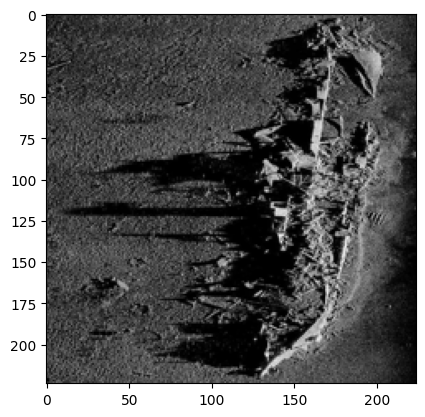

In [95]:
print(labels[0])
plt.imshow(normalized_images[0])
plt.show()

## Handling the imbalance in the dataset

In [96]:
#counting the number of labels in each classes

count_of_classes = {}

for label in labels:
    if label in count_of_classes:
        count_of_classes[label] +=1
    else:
        count_of_classes[label] = 1
        
        
for key, value in count_of_classes.items():
    print(f'{key}:{value}')

ship:753
plane:123
human:34
fish:1334
mine:167
seafloor:578


#### Balanced number of images/class

Ships has more images - Under Sampling

Plane has less images - Over Sampling

Human too has less images - Over Sampling

In [97]:
required_size = round(len(labels)/6)
print(f"we should have {required_size} images in each class")

we should have 498 images in each class


In [98]:
import random

In [99]:
import random
import numpy as np

# Define the number of synthetic images you want to generate for each class
num_synthetic_images_per_class = 498

# Define a function to apply augmentations and generate synthetic images
def generate_synthetic_image(image_data, label):
    # Apply random augmentations based on your requirements
    # For example, you can resize, rotate, flip, change brightness, etc.
    # Here, I'm applying random horizontal flip and rotation
    augmented_image = image_data.copy()
    if random.choice([True, False]):
        augmented_image = np.fliplr(augmented_image)
    rotation_angle = random.randint(-45, 45)
    augmented_image = np.rot90(augmented_image, k=random.randint(0, 3), axes=(0, 1))
    
    # Return the augmented image and its label
    return augmented_image, label

# Separate images and labels by class
ship_images = [image_data for image_data, label in zip(normalized_images, labels) if label == 'ship']
plane_images = [image_data for image_data, label in zip(normalized_images, labels) if label == 'plane']
human_images = [image_data for image_data, label in zip(normalized_images, labels) if label == 'human']
fish_images = [image_data for image_data, label in zip(normalized_images, labels) if label == 'fish']
mine_images = [image_data for image_data, label in zip(normalized_images, labels) if label == 'mine']
seafloor_images = [image_data for image_data, label in zip(normalized_images, labels) if label == 'seafloor']

# Count the number of existing images for each class
num_ship_images = len(ship_images)
num_plane_images = len(plane_images)
num_human_images = len(human_images)
num_fish_images = len(fish_images)
num_mine_images = len(mine_images)
num_seafloor_images = len(seafloor_images)

# Upsample the classes to match the number of synthetic images per class
while num_ship_images < num_synthetic_images_per_class:
    image_data = random.choice(ship_images)
    synthetic_image, synthetic_label = generate_synthetic_image(image_data, 'ship')
    ship_images.append(synthetic_image)
    num_ship_images += 1

while num_plane_images < num_synthetic_images_per_class:
    image_data = random.choice(plane_images)
    synthetic_image, synthetic_label = generate_synthetic_image(image_data, 'plane')
    plane_images.append(synthetic_image)
    num_plane_images += 1

while num_human_images < num_synthetic_images_per_class:
    image_data = random.choice(human_images)
    synthetic_image, synthetic_label = generate_synthetic_image(image_data, 'human')
    human_images.append(synthetic_image)
    num_human_images += 1

while num_fish_images < num_synthetic_images_per_class:
    image_data = random.choice(fish_images)
    synthetic_image, synthetic_label = generate_synthetic_image(image_data, 'fish')
    fish_images.append(synthetic_image)
    num_fish_images += 1

while num_mine_images < num_synthetic_images_per_class:
    image_data = random.choice(mine_images)
    synthetic_image, synthetic_label = generate_synthetic_image(image_data, 'mine')
    mine_images.append(synthetic_image)
    num_mine_images += 1

while num_seafloor_images < num_synthetic_images_per_class:
    image_data = random.choice(seafloor_images)
    synthetic_image, synthetic_label = generate_synthetic_image(image_data, 'seafloor')
    seafloor_images.append(synthetic_image)
    num_seafloor_images += 1

# Sample 224 images randomly from each class
selected_ship_images = random.sample(ship_images, num_synthetic_images_per_class)
selected_plane_images = random.sample(plane_images, num_synthetic_images_per_class)
selected_human_images = random.sample(human_images, num_synthetic_images_per_class)
selected_fish_images = random.sample(fish_images, num_synthetic_images_per_class)
selected_mine_images = random.sample(mine_images, num_synthetic_images_per_class)
selected_seafloor_images = random.sample(seafloor_images, num_synthetic_images_per_class)

# Combine images and labels to create the final dataset
synthetic_images = (
    selected_ship_images +
    selected_plane_images +
    selected_human_images +
    selected_fish_images +
    selected_mine_images +
    selected_seafloor_images
)

synthetic_labels = (
    ['ship'] * num_synthetic_images_per_class +
    ['plane'] * num_synthetic_images_per_class +
    ['human'] * num_synthetic_images_per_class +
    ['fish'] * num_synthetic_images_per_class +
    ['mine'] * num_synthetic_images_per_class +
    ['seafloor'] * num_synthetic_images_per_class
)

print("Synthetic Images are generated by flipping & rotation, stored as synthetic_images and synthetic_labels")


Synthetic Images are generated by flipping & rotation, stored as synthetic_images and synthetic_labels


In [100]:
#counting the number of labels in each classes

count_of_classes = {}

for label in synthetic_labels:
    if label in count_of_classes:
        count_of_classes[label] +=1
    else:
        count_of_classes[label] = 1
        
        
for key, value in count_of_classes.items():
    print(f'{key}:{value}')

ship:498
plane:498
human:498
fish:498
mine:498
seafloor:498


In [101]:
for i in range(min(5, len(synthetic_images))):
    sample_image_data = synthetic_images[i]
    print(f"Sample Image Data {i + 1}: {sample_image_data}")


Sample Image Data 1: [[[0.3882353  0.3882353  0.3882353 ]
  [0.35686275 0.35686275 0.35686275]
  [0.2784314  0.2784314  0.2784314 ]
  ...
  [0.5686275  0.5686275  0.5686275 ]
  [0.56078434 0.56078434 0.56078434]
  [0.56078434 0.56078434 0.56078434]]

 [[0.38039216 0.38039216 0.38039216]
  [0.3529412  0.3529412  0.3529412 ]
  [0.2784314  0.2784314  0.2784314 ]
  ...
  [0.5803922  0.5803922  0.5803922 ]
  [0.57254905 0.57254905 0.57254905]
  [0.57254905 0.57254905 0.57254905]]

 [[0.36078432 0.36078432 0.36078432]
  [0.3372549  0.3372549  0.3372549 ]
  [0.2784314  0.2784314  0.2784314 ]
  ...
  [0.6039216  0.6039216  0.6039216 ]
  [0.59607846 0.59607846 0.59607846]
  [0.59607846 0.59607846 0.59607846]]

 ...

 [[0.3137255  0.3137255  0.3137255 ]
  [0.33333334 0.33333334 0.33333334]
  [0.3764706  0.3764706  0.3764706 ]
  ...
  [0.60784316 0.60784316 0.60784316]
  [0.62352943 0.62352943 0.62352943]
  [0.6313726  0.6313726  0.6313726 ]]

 [[0.34117648 0.34117648 0.34117648]
  [0.36078432 0.

In [102]:
# Lets save the synthetic images

import os
from PIL import Image
import numpy as np

# Define the base output directory
base_output_directory = "/tf/Purushothaman/synthetic_data_6_class"
os.makedirs(base_output_directory, exist_ok=True)

# Loop through the combined data and save images in corresponding class folders
for label, image_data in zip(synthetic_labels, synthetic_images):
    class_directory = os.path.join(base_output_directory, str(label))
    os.makedirs(class_directory, exist_ok=True)
    image_filename = os.path.join(class_directory, f"image_{len(os.listdir(class_directory)) + 1}.jpg")  # Using number of existing files in the folder as a unique identifier
    
    # Convert the image data to a numpy array and then to a PIL image
    image_array = np.array(image_data *255, dtype=np.uint8)
    pil_image = Image.fromarray(image_array)
    
    # Save the PIL image as JPEG
    pil_image.save(image_filename, 'JPEG')

print("Synthetic Images have been saved in class-labeled folders as JPEG files.")

Synthetic Images have been saved in class-labeled folders as JPEG files.


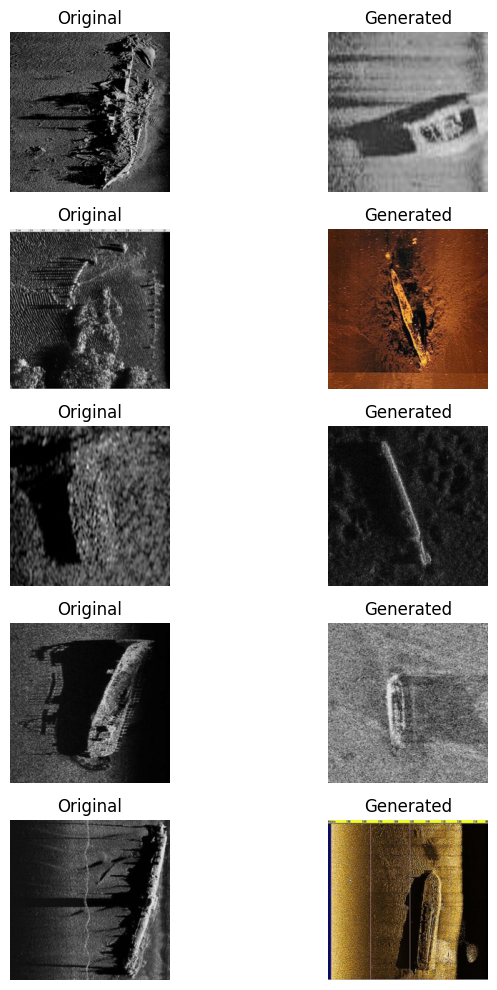

In [103]:
# Function to display images
def plot_images(original_images, generated_images, num_images=1000):
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 2*num_images))
    for i in range(num_images):
        axes[i, 0].imshow(original_images[i])
        axes[i, 0].set_title('Original')
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(generated_images[i])
        axes[i, 1].set_title('Generated')
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

# Display original and generated images side by side
num_images_to_display = 5
original_images_to_display = normalized_images[:num_images_to_display]
generated_images_to_display = synthetic_images[:num_images_to_display]

plot_images(original_images_to_display, generated_images_to_display, num_images=num_images_to_display)

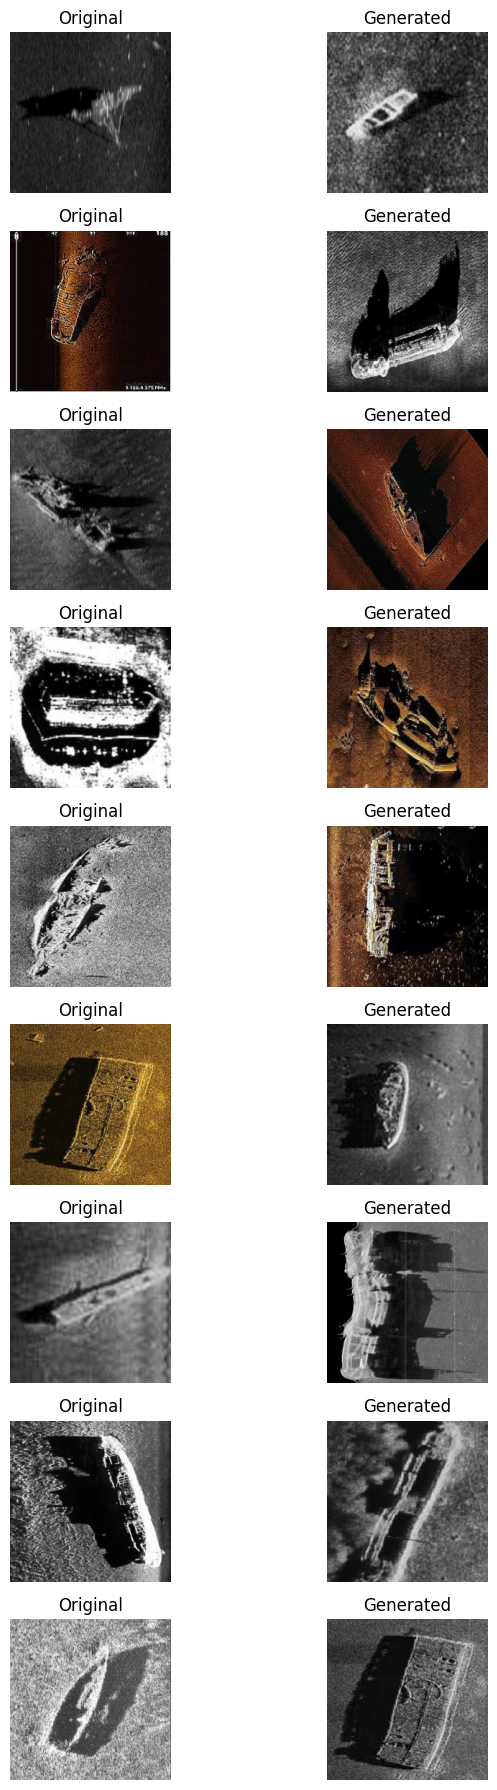

In [104]:
import matplotlib.pyplot as plt

# Function to display images
def plot_images(original_images, generated_images):
    num_images = len(original_images)
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 2*num_images))
    for i in range(num_images):
        axes[i, 0].imshow(original_images[i])
        axes[i, 0].set_title('Original')
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(generated_images[i])
        axes[i, 1].set_title('Generated')
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

# Assuming normalized_images and synthetic_images are lists or arrays containing images
plot_images(normalized_images[200:209], synthetic_images[200:209])


In [105]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [106]:

# Initialize empty lists to store processed images and corresponding labels
processed_images = []
processed_labels = []

# Load, preprocess, and align images and labels
for image, label in zip(synthetic_images, synthetic_labels):
    try:
        processed_images.append(image)
        processed_labels.append(label)
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(processed_labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_labels = integer_encoded_labels.reshape(len(integer_encoded_labels), 1)
onehot_encoded_labels = onehot_encoder.fit_transform(integer_encoded_labels)

# Convert processed_images and onehot_encoded_labels to numpy arrays
processed_images = np.array(processed_images)
onehot_encoded_labels = np.array(onehot_encoded_labels)

# Save processed_images and onehot_encoded_labels in the current directory
np.save("processed_images.npy", processed_images)
np.save("onehot_encoded_labels.npy", onehot_encoded_labels)

# Verify the shapes of processed_images and onehot_encoded_labels
print("Shape of processed_images:", processed_images.shape)
print("Shape of onehot_encoded_labels:", onehot_encoded_labels.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of processed_images: (2988, 224, 224, 3)
Shape of onehot_encoded_labels: (2988, 6)


# Model Development

In [107]:
# Import ResNeXt50 from tensorflow.keras.applications
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, DenseNet121, MobileNetV2, Xception

In [108]:
#importing the model & dense layer for customizing the neural network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [109]:
#input shape & dimension for the pre-trained models
shape=(224, 224, 3)

In [110]:
# Load pre-trained models
base_model_1 = VGG16(weights='imagenet', include_top=False, input_shape=shape)
base_model_2 = VGG19(weights='imagenet', include_top=False, input_shape=shape)
base_model_3 = ResNet50(weights='imagenet', include_top=False, input_shape=shape)
base_model_4 = InceptionV3(weights='imagenet', include_top=False, input_shape=shape)
base_model_5 = DenseNet121(weights='imagenet', include_top=False, input_shape=shape)
base_model_6 = MobileNetV2(weights='imagenet', include_top=False, input_shape=shape)
base_model_7 = Xception(weights='imagenet', include_top=False, input_shape=shape)

print('Loaded')

Loaded


In [111]:
base_models = [base_model_1, base_model_2, base_model_3, 
               base_model_4, base_model_5, base_model_6, 
               base_model_7]

In [112]:
# Looping through the Base models and printing the summaries
for idx, model in enumerate(base_models):
    print(f'Summary of Base Model {idx +1}:')
    model.summary()

Summary of Base Model 1:
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [113]:
#Freezing the pre-trained model's last layer for transfer learning
for model in base_models:
    for layer in model.layers:
        layer.trainable=False

## Customize the model

In [114]:
custom_models = []

for idx, model in enumerate(base_models):
    x = model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    custom_model = Model(inputs=model.input, outputs=predictions)
    custom_models.append(custom_model)
    print(f"Customized the model - {idx+1}")

Customized the model - 1
Customized the model - 2
Customized the model - 3
Customized the model - 4
Customized the model - 5
Customized the model - 6
Customized the model - 7


In [115]:
# Looping through the Base models and printing the summaries
for idx, model in enumerate(custom_models):
    print(f'Summary of Custom Model {idx +1}:')
    model.summary()

Summary of Custom Model 1:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Compile the model

In [116]:
compiled_models = []
for idx, custom_model in enumerate(custom_models):
    custom_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    compiled_models.append(custom_model)
    print(f"Compiled Custom Model {idx + 1}")

Compiled Custom Model 1
Compiled Custom Model 2
Compiled Custom Model 3
Compiled Custom Model 4
Compiled Custom Model 5
Compiled Custom Model 6
Compiled Custom Model 7


In [117]:
for idx, model in enumerate(compiled_models):
    print(f'Summary of compiled model {idx +1}: ')
    model.summary()

Summary of compiled model 1: 
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (N

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Train the model

In [118]:
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [119]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [120]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_images, onehot_encoded_labels, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2390, 224, 224, 3)
Shape of y_train: (2390, 6)
Shape of X_test: (598, 224, 224, 3)
Shape of y_test: (598, 6)


In [121]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100):
    results = []
    for model, model_name in zip(compiled_models, model_names):
        # Initialize variables for tracking maximum accuracy
        max_accuracy = 0
        max_accuracy_epoch = 0

        # Define a checkpoint to save the model when target accuracy is reached
        checkpoint = ModelCheckpoint(f'{model_name}_model.h5', monitor='val_accuracy', 
                                     save_best_only=True, save_weights_only=False, mode='max', verbose=1)

        # Define early stopping to stop training if accuracy doesn't improve for 10 epochs
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

        # Train the current model 
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32, callbacks=[checkpoint, early_stopping])
        
        
        current_epoch_predictions = []
        current_epoch_labels = []
        
        for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
            # Check if the current epoch achieves higher accuracy than the previous maximum
            if val_accuracy > max_accuracy:
                max_accuracy = val_accuracy
                max_accuracy_epoch = epoch
                current_epoch_predictions = model.predict(X_test)
                current_epoch_labels = y_test.argmax(axis=1)

        # Get the maximum accuracy and the corresponding epoch
        max_accuracy_epoch = np.argmax(history.history['val_accuracy'])
        max_accuracy = history.history['val_accuracy'][max_accuracy_epoch]

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {model_name}: {test_accuracy}')

        # Store results
        results.append({'Model': model_name, 'Accuracy': max_accuracy})

        print("-" * 40)  # Print a line of dashes 
        print(f"Maximum accuracy of {max_accuracy:.2f} achieved at epoch {max_accuracy_epoch+1}")
        print("Model with high accuracy is saved using the keras ModelCheckpoint")
        print("-" * 40)  # Print a line of dashes 
        print("\n")

        # Assuming model.predict returns probabilities for each class
        y_pred_probs = model.predict(X_test)

        # Convert probabilities to class labels
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Convert true labels to class labels if y_test is one-hot encoded
        y_true = np.argmax(y_test, axis=1)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(model_name)
        plt.show()
    return results


In [122]:
count_of_classes

{'ship': 498,
 'plane': 498,
 'human': 498,
 'fish': 498,
 'mine': 498,
 'seafloor': 498}

In [123]:
model_names = ["VGG16", "VGG19", "ResNet50", "InceptionV3", "DenseNet121", "MobileNetV2", "Xception"]
class_labels = ['Ship', 'Plane', 'Human', 'Fish', 'Mine', 'Seafloor']

In [ ]:
#Train and Evaluate the model
results = train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100)

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.8289
Epoch 1: val_accuracy improved from -inf to 0.92642, saving model to VGG16_model.h5
75/75 [==============================] - 100s 1s/step - loss: 0.4478 - accuracy: 0.8289 - val_loss: 0.1688 - val_accuracy: 0.9264
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.1025 - accuracy: 0.9703
Epoch 2: val_accuracy improved from 0.92642 to 0.95318, saving model to VGG16_model.h5
75/75 [==============================] - 90s 1s/step - loss: 0.1025 - accuracy: 0.9703 - val_loss: 0.1382 - val_accuracy: 0.9532
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.0583 - accuracy: 0.9841
Epoch 3: val_accuracy improved from 0.95318 to 0.95485, saving model to VGG16_model.h5
75/75 [==============================] - 88s 1s/step - loss: 0.0583 - accuracy: 0.9841 - val_loss: 0.1152 - val_accuracy: 0.9548
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 

In [48]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

         Model  Accuracy
0        VGG16  0.969900
1        VGG19  0.966555
2     ResNet50  0.889632
3  InceptionV3  0.983278
4  DenseNet121  0.994983
5  MobileNetV2  0.976589
6     Xception  0.983278


In [49]:
from tabulate import tabulate

# Define the headers for the table
headers = ["Model", "Test Accuracy"]

# Print the table
print('Models Accuracy :- 3 Classes : 224 images/class')
print(tabulate(results_df, headers, tablefmt="grid"))

Models Accuracy :- 3 Classes : 224 images/class
+----+-------------+-----------------+
|    | Model       |   Test Accuracy |
+====+=============+=================+
|  0 | VGG16       |        0.9699   |
+----+-------------+-----------------+
|  1 | VGG19       |        0.966555 |
+----+-------------+-----------------+
|  2 | ResNet50    |        0.889632 |
+----+-------------+-----------------+
|  3 | InceptionV3 |        0.983278 |
+----+-------------+-----------------+
|  4 | DenseNet121 |        0.994983 |
+----+-------------+-----------------+
|  5 | MobileNetV2 |        0.976589 |
+----+-------------+-----------------+
|  6 | Xception    |        0.983278 |
+----+-------------+-----------------+


## Lets try different Hyper-parameters 

In [50]:
compiled_models = []
for idx, custom_model in enumerate(custom_models):
    custom_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    compiled_models.append(custom_model)
    print(f"Compiled Custom Model {idx + 1}")

for idx, model in enumerate(compiled_models):
    print(f'Summary of compiled model {idx +1}: ')
    model.summary()

Compiled Custom Model 1
Compiled Custom Model 2
Compiled Custom Model 3
Compiled Custom Model 4
Compiled Custom Model 5
Compiled Custom Model 6
Compiled Custom Model 7
Summary of compiled model 1: 
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                             

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100):
    results = []
    for model, model_name in zip(compiled_models, model_names):
        # Initialize variables for tracking maximum accuracy
        max_accuracy = 0
        max_accuracy_epoch = 0

        # Define a checkpoint to save the model when target accuracy is reached
        checkpoint = ModelCheckpoint(f'{model_name}_model_RMSprop.h5', monitor='val_accuracy', 
                                     save_best_only=True, save_weights_only=False, mode='max', verbose=1)

        # Define early stopping to stop training if accuracy doesn't improve for 10 epochs
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

        # Train the current model 
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=16, callbacks=[checkpoint, early_stopping])
        
        
        current_epoch_predictions = []
        current_epoch_labels = []
        
        for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
            # Check if the current epoch achieves higher accuracy than the previous maximum
            if val_accuracy > max_accuracy:
                max_accuracy = val_accuracy
                max_accuracy_epoch = epoch
                current_epoch_predictions = model.predict(X_test)
                current_epoch_labels = y_test.argmax(axis=1)

        # Get the maximum accuracy and the corresponding epoch
        max_accuracy_epoch = np.argmax(history.history['val_accuracy'])
        max_accuracy = history.history['val_accuracy'][max_accuracy_epoch]

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {model_name}: {test_accuracy}')

        # Store results
        results.append({'Model': model_name, 'Accuracy': max_accuracy})

        print("-" * 40)  # Print a line of dashes 
        print(f"Maximum accuracy of {max_accuracy:.2f} achieved at epoch {max_accuracy_epoch+1}")
        print("Model with high accuracy is saved using the keras ModelCheckpoint")
        print("-" * 40)  # Print a line of dashes 
        print("\n")

        # Assuming model.predict returns probabilities for each class
        y_pred_probs = model.predict(X_test)

        # Convert probabilities to class labels
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Convert true labels to class labels if y_test is one-hot encoded
        y_true = np.argmax(y_test, axis=1)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(model_name)
        plt.show()
    return results

In [ ]:
#Train and Evaluate the model
RMSprop_results = train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100)

In [52]:
RMSprop_results_df = pd.DataFrame(RMSprop_results)
print(RMSprop_results_df)

         Model  Accuracy
0        VGG16  0.966555
1        VGG19  0.968227
2     ResNet50  0.837793
3  InceptionV3  0.978261
4  DenseNet121  0.989967
5  MobileNetV2  0.986622
6     Xception  0.986622


In [53]:
from tabulate import tabulate

# Define the headers for the table
headers = ["Model", "Test Accuracy"]

# Print the table
print('Models Accuracy :- 3 Classes : 224 images/class')
print(tabulate(RMSprop_results_df, headers, tablefmt="grid"))

Models Accuracy :- 3 Classes : 224 images/class
+----+-------------+-----------------+
|    | Model       |   Test Accuracy |
+====+=============+=================+
|  0 | VGG16       |        0.966555 |
+----+-------------+-----------------+
|  1 | VGG19       |        0.968227 |
+----+-------------+-----------------+
|  2 | ResNet50    |        0.837793 |
+----+-------------+-----------------+
|  3 | InceptionV3 |        0.978261 |
+----+-------------+-----------------+
|  4 | DenseNet121 |        0.989967 |
+----+-------------+-----------------+
|  5 | MobileNetV2 |        0.986622 |
+----+-------------+-----------------+
|  6 | Xception    |        0.986622 |
+----+-------------+-----------------+


In [56]:
print("6 Class Balanced Data")
print("Model with 'Adam' Optimizer")
print(results_df)
print('---' * 10)
print("Model with 'RMSprop' Optimizer")
print(RMSprop_results_df)

6 Class Balanced Data
Model with 'Adam' Optimizer
         Model  Accuracy
0        VGG16  0.969900
1        VGG19  0.966555
2     ResNet50  0.889632
3  InceptionV3  0.983278
4  DenseNet121  0.994983
5  MobileNetV2  0.976589
6     Xception  0.983278
------------------------------
Model with 'RMSprop' Optimizer
         Model  Accuracy
0        VGG16  0.966555
1        VGG19  0.968227
2     ResNet50  0.837793
3  InceptionV3  0.978261
4  DenseNet121  0.989967
5  MobileNetV2  0.986622
6     Xception  0.986622


In [57]:
#prediction

In [59]:
os.getcwd()

'/tf/Purushothaman/6 Class model/Balanced Model'

In [124]:
import os
import tensorflow as tf

directory_path = '/tf/Purushothaman/6 Class model/Balanced Model'
loaded_models = {}

for filename in os.listdir(directory_path):
    if filename.endswith(".h5"):  # Assuming the models are saved in HDF5 format with .h5 extension
        model_name = os.path.splitext(filename)[0]  # Get the model name without extension
        model_path = os.path.join(directory_path, filename)
        loaded_model = tf.keras.models.load_model(model_path)  # Load the model using TensorFlow
        loaded_models[model_name] = loaded_model

# Print the loaded model names
print("Loaded model names:")
print(list(loaded_models.keys()))

Loaded model names:
['VGG19_model_RMSprop', 'VGG16_model_RMSprop', 'InceptionV3_model_RMSprop', 'VGG16_model', 'VGG19_model', 'MobileNetV2_model_RMSprop', 'ResNet50_model', 'MobileNetV2_model', 'Xception_model_RMSprop', 'ResNet50_model_RMSprop', 'Xception_model', 'DenseNet121_model_RMSprop', 'DenseNet121_model', 'InceptionV3_model']


In [125]:
from sklearn.metrics import accuracy_score, classification_report

for model_name, model in loaded_models.items():
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate accuracy score
    accuracy = accuracy_score(y_true, y_pred)

    # Generate classification report
    class_report = classification_report(y_true, y_pred, target_names=class_labels)

    # Print individual class prediction accuracy score
    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n{class_report}")


19/19 [==============================] - 14s 736ms/step
Accuracy for VGG19_model_RMSprop: 0.97
Classification Report for VGG19_model_RMSprop:
              precision    recall  f1-score   support

        Ship       1.00      1.00      1.00       102
       Plane       0.99      1.00      1.00       106
       Human       1.00      1.00      1.00        90
        Fish       0.96      0.86      0.91        91
        Mine       1.00      0.99      0.99        92
    Seafloor       0.89      0.97      0.93       117

    accuracy                           0.97       598
   macro avg       0.97      0.97      0.97       598
weighted avg       0.97      0.97      0.97       598

19/19 [==============================] - 11s 589ms/step
Accuracy for VGG16_model_RMSprop: 0.98
Classification Report for VGG16_model_RMSprop:
              precision    recall  f1-score   support

        Ship       1.00      1.00      1.00       102
       Plane       0.99      1.00      1.00       106
       Hum

19/19 [==============================] - 18s 959ms/step


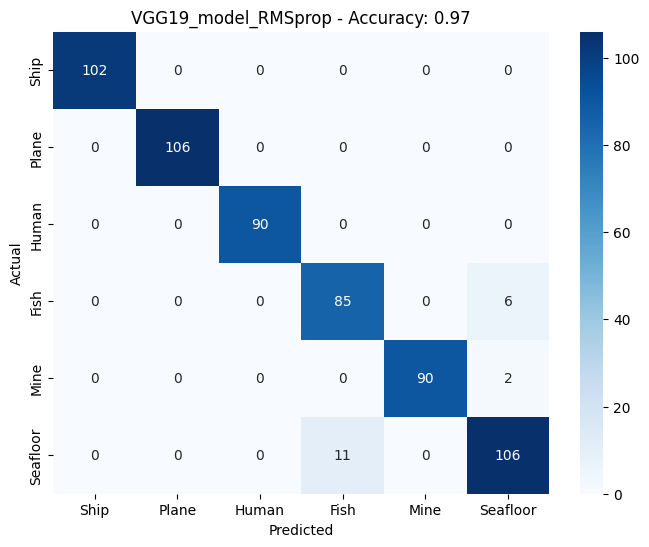

Accuracy for VGG19_model_RMSprop: 0.97
19/19 [==============================] - 14s 694ms/step


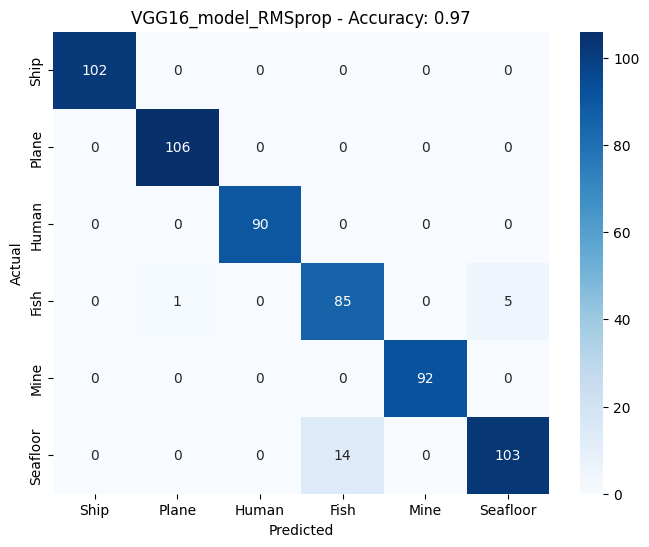

Accuracy for VGG16_model_RMSprop: 0.97
19/19 [==============================] - 5s 233ms/step


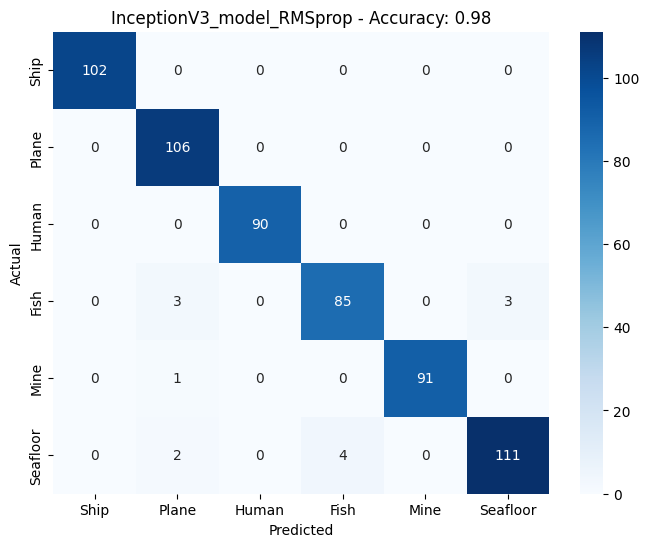

Accuracy for InceptionV3_model_RMSprop: 0.98
19/19 [==============================] - 13s 665ms/step


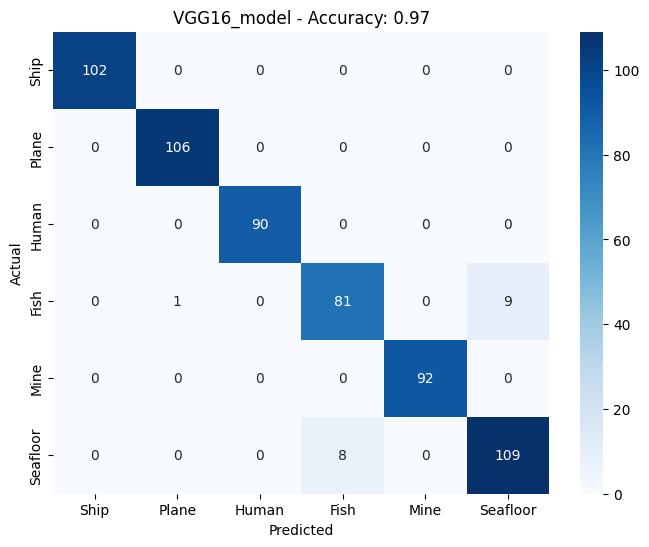

Accuracy for VGG16_model: 0.97
19/19 [==============================] - 18s 910ms/step


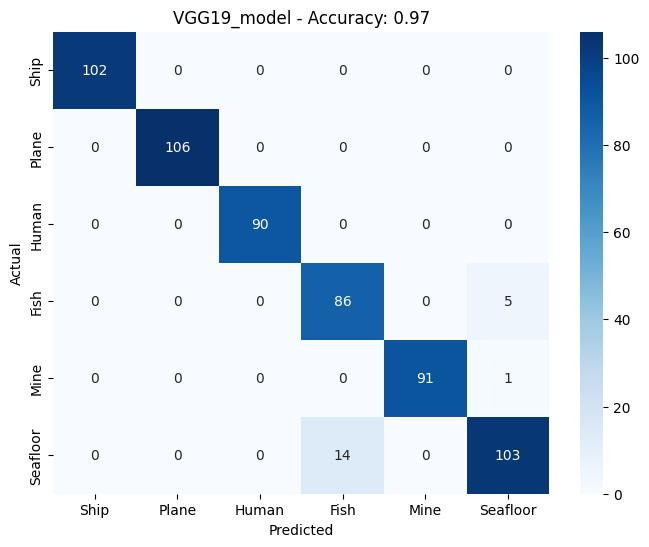

Accuracy for VGG19_model: 0.97
19/19 [==============================] - 7s 302ms/step


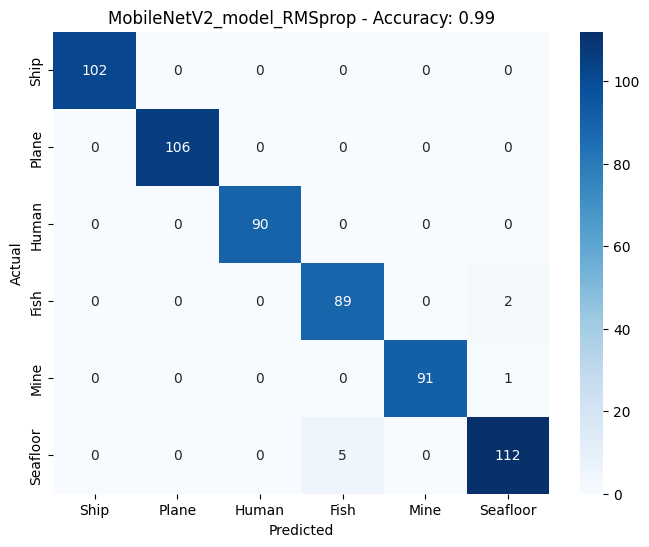

Accuracy for MobileNetV2_model_RMSprop: 0.99
19/19 [==============================] - 19s 927ms/step


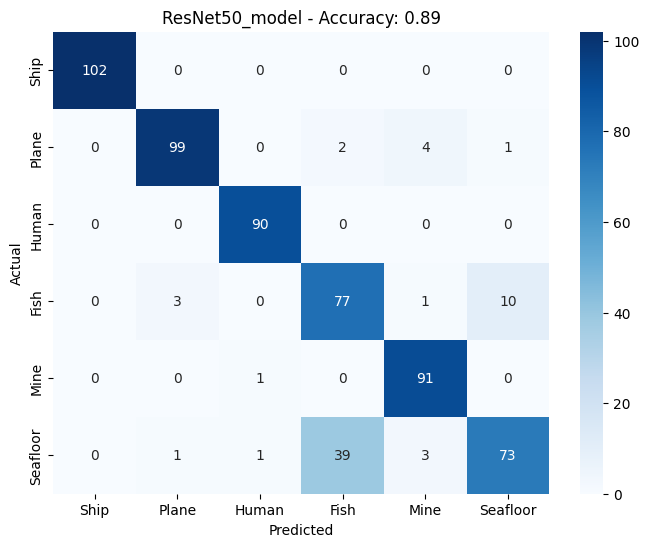

Accuracy for ResNet50_model: 0.89
19/19 [==============================] - 4s 193ms/step


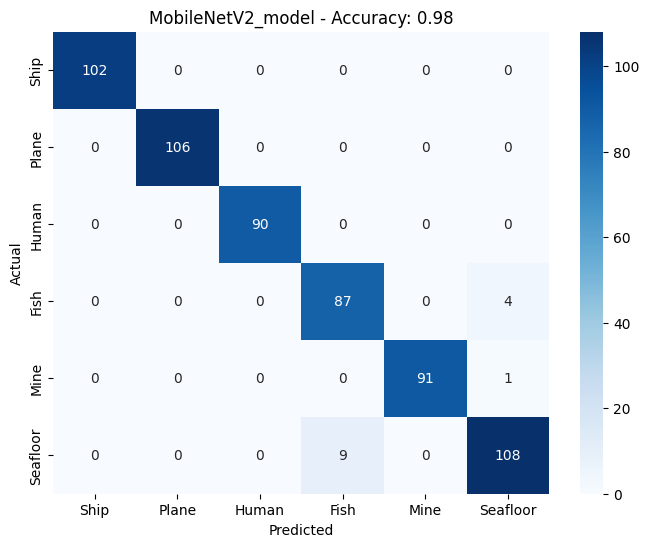

Accuracy for MobileNetV2_model: 0.98
19/19 [==============================] - 13s 636ms/step


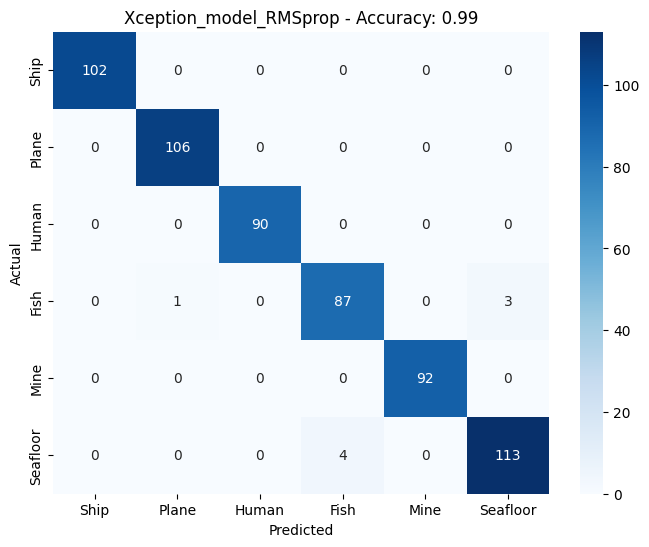

Accuracy for Xception_model_RMSprop: 0.99
19/19 [==============================] - 17s 803ms/step


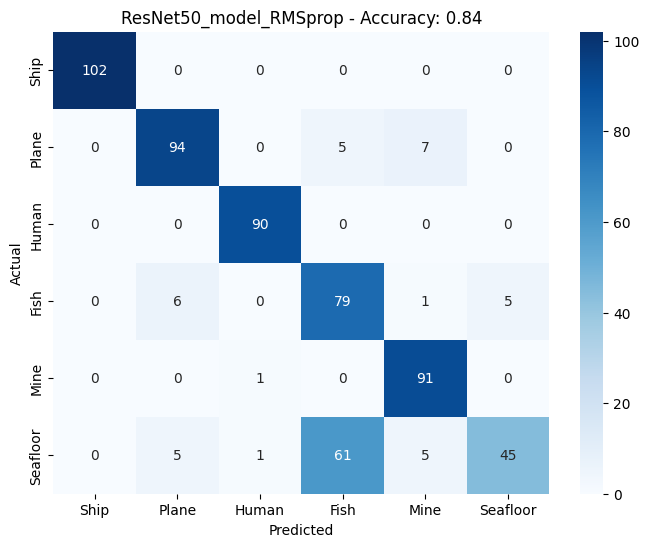

Accuracy for ResNet50_model_RMSprop: 0.84
19/19 [==============================] - 14s 678ms/step


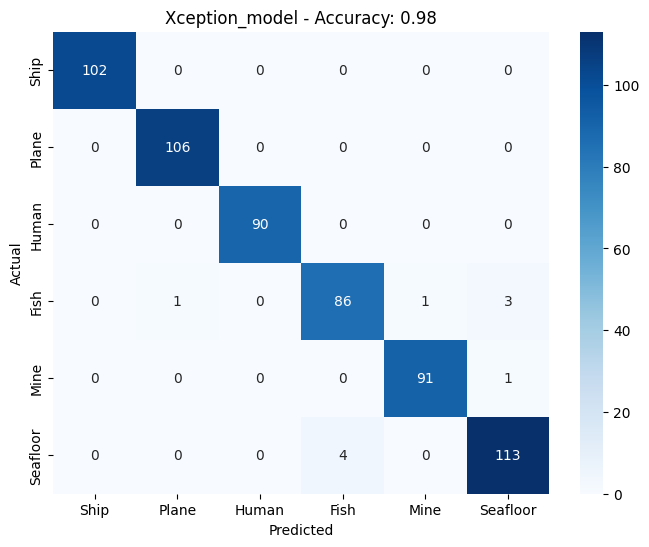

Accuracy for Xception_model: 0.98
19/19 [==============================] - 16s 739ms/step


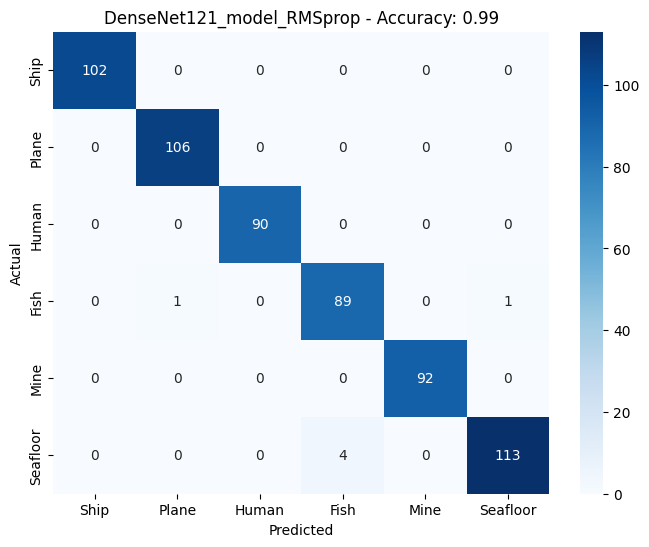

Accuracy for DenseNet121_model_RMSprop: 0.99
19/19 [==============================] - 15s 747ms/step


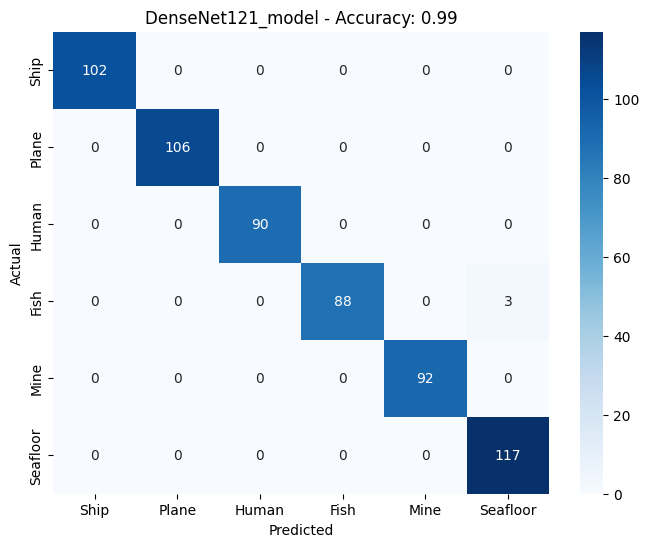

Accuracy for DenseNet121_model: 0.99
19/19 [==============================] - 8s 285ms/step


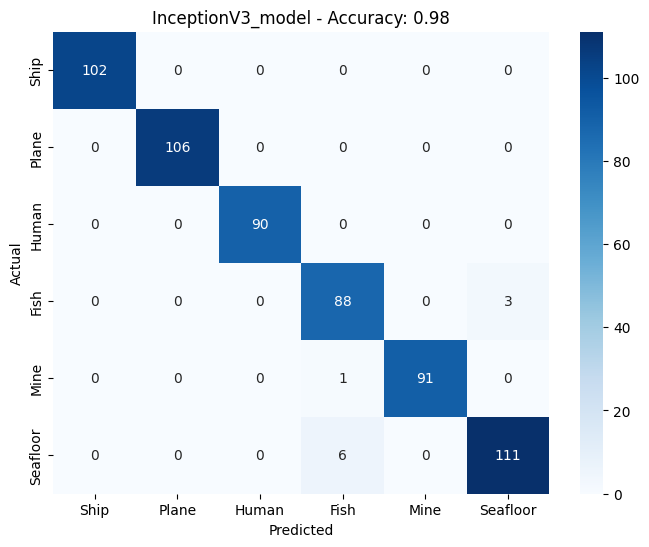

Accuracy for InceptionV3_model: 0.98


In [62]:
from sklearn.metrics import accuracy_score

for model_name, model in loaded_models.items():
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate accuracy score
    accuracy = accuracy_score(y_true, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{model_name} - Accuracy: {accuracy:.2f}")  # Include accuracy in the title
    plt.show()

    # Print accuracy score
    print(f"Accuracy for {model_name}: {accuracy:.2f}")

In [1]:
# Lime test 

In [1]:
import os
from PIL import Image

folder_path = "/tf/Test images"
images = []
file_names = []

# Check if the specified path is a directory
if os.path.isdir(folder_path):
    # Iterate through files in the directory
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # Check if the file is an image
        if filename.lower().endswith(('png', 'jpg', 'jpeg', 'gif')):
            # Open and append the image to the images list
            try:
                img = Image.open(file_path)
                images.append(img)
                file_names.append(filename)  # Store the file name in the file_names list
            except Exception as e:
                print(f'Error loading image {file_path}: {str(e)}')
else:
    print(f'The specified path is not a directory: {folder_path}')

# Now, images contains all the loaded images and file_names contains corresponding file names
print(f'Number of images loaded: {len(images)}')
print(f'Number of file names loaded: {len(file_names)}')


Number of images loaded: 12
Number of file names loaded: 12


In [2]:
import numpy as np
# Convert PIL images to numpy arrays
numpy_images = [np.array(image) for image in images]

# Resize and convert images to RGB format if necessary
target_size = (224, 224)
reshaped_images = []
for idx, image in enumerate(numpy_images):
    pil_image = Image.fromarray(image)
    pil_image = pil_image.resize(target_size)
    # Convert to RGB if image is grayscale
    if pil_image.mode != 'RGB':
        pil_image = pil_image.convert('RGB')
    reshaped_images.append(np.array(pil_image))

# Shape of reshaped images
for idx, img in enumerate(reshaped_images):
    print(f'Image {idx+1} shape after resizing {img.shape}')
# Convert images to float32 and normalize to [0, 1]
normalized_images = np.array(reshaped_images, dtype=np.float32) / 255.0

# Verify the shape and data type of processed_images
print("Shape of normalized_images:", normalized_images.shape)
print("Data type of processed_images:", normalized_images.dtype)

Image 1 shape after resizing (224, 224, 3)
Image 2 shape after resizing (224, 224, 3)
Image 3 shape after resizing (224, 224, 3)
Image 4 shape after resizing (224, 224, 3)
Image 5 shape after resizing (224, 224, 3)
Image 6 shape after resizing (224, 224, 3)
Image 7 shape after resizing (224, 224, 3)
Image 8 shape after resizing (224, 224, 3)
Image 9 shape after resizing (224, 224, 3)
Image 10 shape after resizing (224, 224, 3)
Image 11 shape after resizing (224, 224, 3)
Image 12 shape after resizing (224, 224, 3)
Shape of normalized_images: (12, 224, 224, 3)
Data type of processed_images: float32


In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.show(images[0])
plt.show()

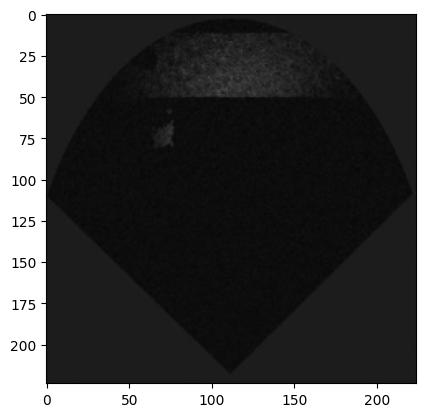

In [5]:
plt.imshow(normalized_images[0])
plt.show()

In [6]:
os.getcwd()

'/tf/Purushothaman/6 Class model/Balanced Model'

In [77]:
import os
from keras.models import load_model

# Define class labels and their corresponding encoded values

# Load the pre-trained models
model_folder = '/tf/Purushothaman/6 Class model/Balanced Model'
# Replace with the path to your model folder
model_files = os.listdir(model_folder)
loaded_models = {}

for model_file in model_files:
    try:
        model_name, extension = os.path.splitext(model_file)
        if extension == '.h5':
            model_path = os.path.join(model_folder, model_file)
            loaded_models[model_name] = load_model(model_path)
            print(f"Loaded model: {model_name}")
        else:
            print(f"Skipped file: {model_file} (not a valid model file)")
    except Exception as e:
        print(f"Error loading model {model_file}: {str(e)}")

print("Model loading completed.")

Skipped file: processed_images.npy (not a valid model file)
Loaded model: VGG19_model_RMSprop
Loaded model: VGG16_model_RMSprop
Loaded model: InceptionV3_model_RMSprop
Loaded model: VGG16_model
Loaded model: VGG19_model
Loaded model: MobileNetV2_model_RMSprop
Skipped file: output.csv (not a valid model file)
Loaded model: ResNet50_model
Loaded model: MobileNetV2_model
Loaded model: Xception_model_RMSprop
Loaded model: ResNet50_model_RMSprop
Loaded model: Xception_model
Skipped file: .ipynb_checkpoints (not a valid model file)
Skipped file: 6 Class - Balanced Data.ipynb (not a valid model file)
Loaded model: DenseNet121_model_RMSprop
Loaded model: DenseNet121_model
Loaded model: InceptionV3_model
Skipped file: onehot_encoded_labels.npy (not a valid model file)
Model loading completed.


In [78]:
# Load label encoder classes
label_encoder_classes = np.load(os.path.join(model_folder, 'onehot_encoded_labels.npy'))

# Set the classes_ attribute of the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.classes_ = label_encoder_classes
print('loaded')

loaded


In [79]:
class_labels = ['Ship', 'Plane', 'Human', 'Fish', 'Mine', 'Seafloor']
label_encoder.fit(class_labels)

LabelEncoder()

In [58]:
from PIL import Image
import os
import numpy as np
import pandas as pd

# Define the folder containing images
image_folder = "/tf/Test images/"

# List all files in the folder
image_files = os.listdir(image_folder)

# Define the target size for resizing
target_size = (224, 224)

# Define a list to store the results
image_results = []

# Iterate through each image file
for image_file in image_files:
    # Get the full file path
    image_path = os.path.join(image_folder, image_file)
    
    try:
        # Open and process the image using PIL (Pillow)
        pil_image = Image.open(image_path)
        
        # Resize and convert image to RGB format if necessary
        pil_image = pil_image.resize(target_size)
        if pil_image.mode != 'RGB':
            pil_image = pil_image.convert('RGB')

        # Convert image to numpy array
        numpy_image = np.array(pil_image)
        
        # Normalize image to [0, 1]
        normalized_image = numpy_image.astype(np.float32) / 255.0
        
        # Add batch dimension
        normalized_image = np.expand_dims(normalized_image, axis=0)

        image_result = {"Image": image_file}
        
        # Iterate through loaded models and make predictions
        for model_name, model in loaded_models.items():
            # Predict using the current model
            predictions = model.predict(normalized_image)
            
            # Convert numerical predictions to class labels using inverse_transform
            predicted_classes = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
            
            # Add model predictions to the dictionary
            image_result[model_name] = predicted_classes[0]  # Store decoded predictions for each model
        
        # Add the dictionary to the results list
        image_results.append(image_result)
    except Exception as e:
        print(f"Error processing image {image_file}: {str(e)}")

# Create a DataFrame from the results list
df = pd.DataFrame(image_results)

# Print the DataFrame with model names as columns
print(df)


1/1 [==============================] - 0s 77ms/step
Error processing image .ipynb_checkpoints: [Errno 21] Is a directory: '/tf/Test images/.ipynb_checkpoints'
1/1 [==============================] - 0s 74ms/step
                                                Image VGG19_model_RMSprop  \
0                                           mine1.jpg                Mine   
1                                           mine2.jpg                Mine   
2   plane-real_original_plane-24.png_0596f4da-d29c...                Ship   
3   plane-real_original_plane-33.png_7a6b3208-3555...               Plane   
4   plane-real_original_plane-43.png_ba26ae8c-33f5...               Plane   
5   plane-real_original_29.jpg_c8306b4b-878d-4705-...                Ship   
6   plane-real_original_plane-23.png_015d08f4-4385...               Plane   
7                                       s137c3046.jpg                Ship   
8                                  upscaled_cubic.jpg               Plane   
9                  

In [59]:
# Export the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

print("DataFrame has been exported to 'output.csv'")

DataFrame has been exported to 'output.csv'


In [60]:
os.getcwd()

'/tf/Purushothaman/6 Class model/Balanced Model'

In [61]:
df = pd.read_csv('/tf/Purushothaman/6 Class model/Balanced Model/output.csv')

In [62]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Image,mine1.jpg,mine2.jpg,plane-real_original_plane-24.png_0596f4da-d29c...,plane-real_original_plane-33.png_7a6b3208-3555...,plane-real_original_plane-43.png_ba26ae8c-33f5...,plane-real_original_29.jpg_c8306b4b-878d-4705-...,plane-real_original_plane-23.png_015d08f4-4385...,s137c3046.jpg,upscaled_cubic.jpg,fish.png,...,vertical_flip.jpg,ship-012.png,horizontal_flip.jpg,ship-013.png,plane-real_original_30.jpg_62636381-d8af-4ade-...,ship-019-1.png,upscaled_nearest_neighbor.jpg,plane-real_original_21.jpg_47a680e1-0c18-408d-...,ship-005.png,upscaled_bi_linear.jpg
VGG19_model_RMSprop,Mine,Mine,Ship,Plane,Plane,Ship,Plane,Ship,Plane,Fish,...,Plane,Ship,Plane,Ship,Ship,Ship,Plane,Ship,Ship,Plane
VGG16_model_RMSprop,Mine,Mine,Ship,Plane,Plane,Ship,Plane,Ship,Plane,Fish,...,Plane,Ship,Plane,Ship,Ship,Ship,Plane,Ship,Ship,Plane
InceptionV3_model_RMSprop,Mine,Mine,Ship,Plane,Plane,Plane,Plane,Plane,Plane,Fish,...,Plane,Ship,Plane,Ship,Plane,Ship,Plane,Ship,Ship,Plane
VGG16_model,Mine,Mine,Ship,Plane,Plane,Ship,Plane,Ship,Plane,Fish,...,Plane,Ship,Plane,Ship,Ship,Ship,Plane,Ship,Ship,Plane
VGG19_model,Mine,Mine,Ship,Plane,Plane,Plane,Plane,Ship,Plane,Fish,...,Plane,Ship,Plane,Ship,Ship,Ship,Plane,Ship,Ship,Plane
MobileNetV2_model_RMSprop,Mine,Mine,Ship,Plane,Plane,Plane,Plane,Plane,Plane,Fish,...,Plane,Ship,Plane,Ship,Plane,Ship,Plane,Plane,Ship,Plane
ResNet50_model,Mine,Mine,Ship,Plane,Plane,Plane,Plane,Ship,Plane,Fish,...,Plane,Plane,Plane,Ship,Plane,Human,Plane,Plane,Ship,Plane
MobileNetV2_model,Mine,Mine,Ship,Plane,Plane,Plane,Plane,Plane,Plane,Fish,...,Plane,Ship,Plane,Ship,Plane,Ship,Plane,Ship,Ship,Plane
Xception_model_RMSprop,Mine,Mine,Ship,Plane,Plane,Plane,Plane,Plane,Plane,Fish,...,Plane,Ship,Plane,Ship,Plane,Ship,Plane,Seafloor,Ship,Plane


# THE END #